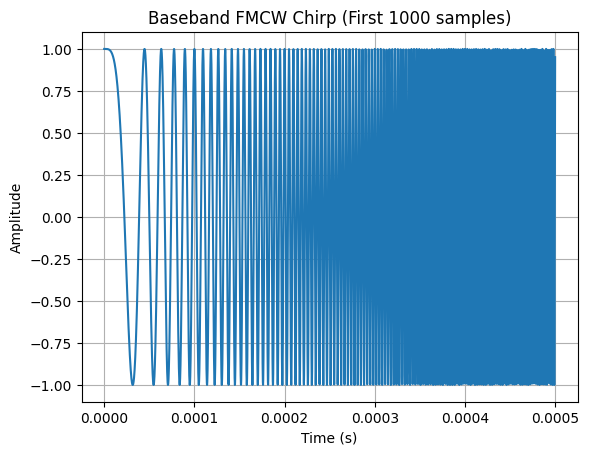

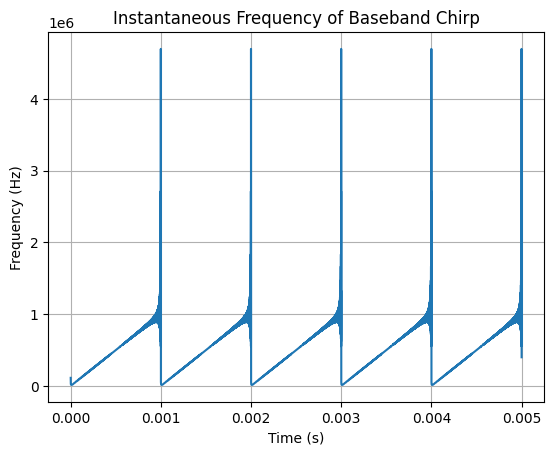

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Simulation parameters
fs = 10e6         # 10 MHz sampling rate
T = 1e-3          # 1 ms sweep time
B = 1e6           # 1 MHz bandwidth (baseband chirp from 0 to 1 MHz)
N = int(T * fs)
t = np.linspace(0, T, N, endpoint=False)

# Generate baseband FMCW chirp 
phase = (B / (2 * T)) * t**2
chirp = np.cos(2 * np.pi * phase)

long_signal = np.tile(chirp, 5)
long_t = np.linspace(0, T*5, N*5, endpoint=False)

# Plot time-domain chirp
plt.plot(long_t[:5000], long_signal[:5000])
plt.title("Baseband FMCW Chirp (First 1000 samples)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Get instantaneous frequency using Hilbert transform
analytic = hilbert(long_signal)
inst_phase = np.unwrap(np.angle(analytic))
inst_freq = np.diff(inst_phase) * fs / (2 * np.pi)

# Plot instantaneous frequency
plt.plot(long_t[1:], inst_freq)
plt.title("Instantaneous Frequency of Baseband Chirp")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.grid(True)
plt.show()